# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import openweathermapy.core as owm

weather_json = []
params = {'units' : 'imperial', 'appid' : api_key}

for city in cities:
    try:
        weather_json.append(owm.get_current(city, **params))
    except:
        print("Record Not Found")

Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found
Record Not Found


In [4]:
len(weather_json)

549

In [5]:
lat = []
name = []
temp = []
clouds = []
humidity = []
wind = []
country = []


for i, v in enumerate (weather_json):
    lat.append(weather_json[i]['coord']['lat'])
    name.append(weather_json[i]['name'])
    temp.append(weather_json[i]['main']['temp'])
    clouds.append(weather_json[i]['clouds']['all'])
    humidity.append(weather_json[i]['main']['humidity'])
    wind.append(weather_json[i]['wind']['speed'])
    country.append(weather_json[i]['sys']['country'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {'city': name,
                'country' : country,
               'latitude' : lat,
               'Temperature': temp,
               'Cloudiness %' : clouds,
               'Humidity %': humidity,
               'Wind Speed': wind}

weather_df = pd.DataFrame(data = weather_dict)
weather_df.head()

,city,country,latitude,Temperature,Cloudiness %,Humidity %,Wind Speed
0,Busselton,AU,-33.64,61.63,100,38,28.72
1,Cape Town,ZA,-33.93,54.66,20,93,6.93
2,Airai,TL,-8.93,65.10,5,79,5.41
3,Vengerovo,RU,55.68,55.20,30,94,7.05
4,Bredasdorp,ZA,-34.53,53.60,0,87,2.24


Text(0, 0.5, 'Temperature (F)')

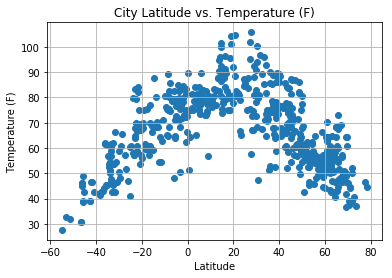

In [11]:
plt.scatter(weather_df['latitude'], weather_df['Temperature'])

plt.grid()
plt.title('City Latitude vs. Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (F)')

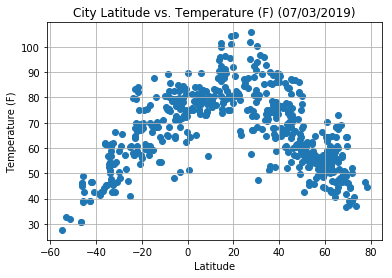

In [13]:
Temperature_Plot = plt.scatter(weather_df['latitude'], weather_df['Temperature'])

plt.grid()
plt.title('City Latitude vs. Temperature (F) (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

#### Latitude vs. Humidity Plot

(-9.215176600441499, 110)

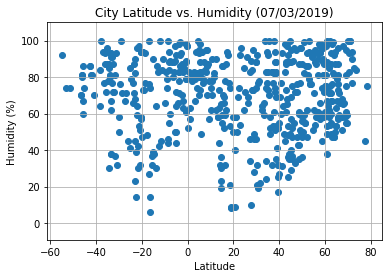

In [18]:
Humidity_Plot = plt.scatter(weather_df['latitude'], weather_df['Humidity %'])

plt.grid()
plt.title('City Latitude vs. Humidity (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(top=110)

#### Latitude vs. Cloudiness Plot

(-5.015176600441501, 110)

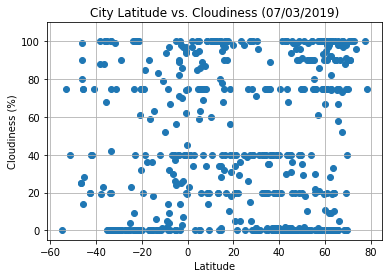

In [19]:
Humidity_Plot = plt.scatter(weather_df['latitude'], weather_df['Cloudiness %'])

plt.grid()
plt.title('City Latitude vs. Cloudiness (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(top=110)

#### Latitude vs. Wind Speed Plot

(-1.1796766004415011, 34)

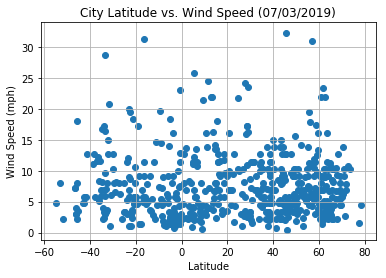

In [24]:
Wind_Plot = plt.scatter(weather_df['latitude'], weather_df['Wind Speed'])

plt.grid()
plt.title('City Latitude vs. Wind Speed (07/03/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(top=34)